In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Markdown as md
from IPython.core.display import display, HTML
np.random.seed(42)
sns.set()

In [2]:
hiv_df = pd.read_stata("./ARM_Data_extra/examples/risky.behavior/risky_behaviors.dta")
hiv_df.describe(include='all')

,sex,couples,women_alone,bs_hiv,bupacts,fupacts
count,434,434.000000,434.000000,434,434.000000,434.000000
unique,2,NaN,NaN,2,NaN,NaN
top,man,NaN,NaN,negative,NaN,NaN
freq,217,NaN,NaN,337,NaN,NaN
mean,NaN,0.373272,0.336406,NaN,25.910139,16.489580
std,NaN,0.484232,0.473025,NaN,31.917963,26.825769
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,0.000000,NaN,5.000000,0.000000
50%,NaN,0.000000,0.000000,NaN,15.000000,5.000000
75%,NaN,1.000000,1.000000,NaN,36.000000,20.925600


In [3]:
mdl_a = smf.poisson(data=hiv_df, formula="fupacts ~ couples + women_alone").fit()
mdl_a.summary()

Optimization terminated successfully.
         Current function value: 16.423400
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                fupacts   No. Observations:                  434
Model:                        Poisson   Df Residuals:                      431
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                 0.02566
Time:                        16:12:51   Log-Likelihood:                -7127.8
converged:                       True   LL-Null:                       -7315.5
Covariance Type:            nonrobust   LLR p-value:                 2.986e-82
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0902      0.019    162.635      0.000       3.053       3.127
couples        -0.3226      0.027    -11.791      0.000      -0.376      -0.269
women_alone    -0.5741      0.030    -18.987      0.000      -0.633      -0.515
===============================================================================
"""

In [4]:
yhat = mdl_a.predict(hiv_df)
resid = hiv_df.fupacts - yhat # mdl_a.resid could be used here as well, going more straightforward for transparency
std_residuals = resid/np.sqrt(yhat)
sr_sq_sum = np.sum(std_residuals*std_residuals)
mdl_a_overdispersion_ratio = sr_sq_sum/(len(hiv_df) - 2) # 2 for the number of predictors
mdl_a_overdispersion_p_value = stats.chi2.cdf(sr_sq_sum, df=mdl_a.df_resid)
f"Overdispersion ratio is {mdl_a_overdispersion_ratio}, p-value of it is {mdl_a_overdispersion_p_value}"

'Overdispersion ratio is 44.04779229512923, p-value of it is 1.0'

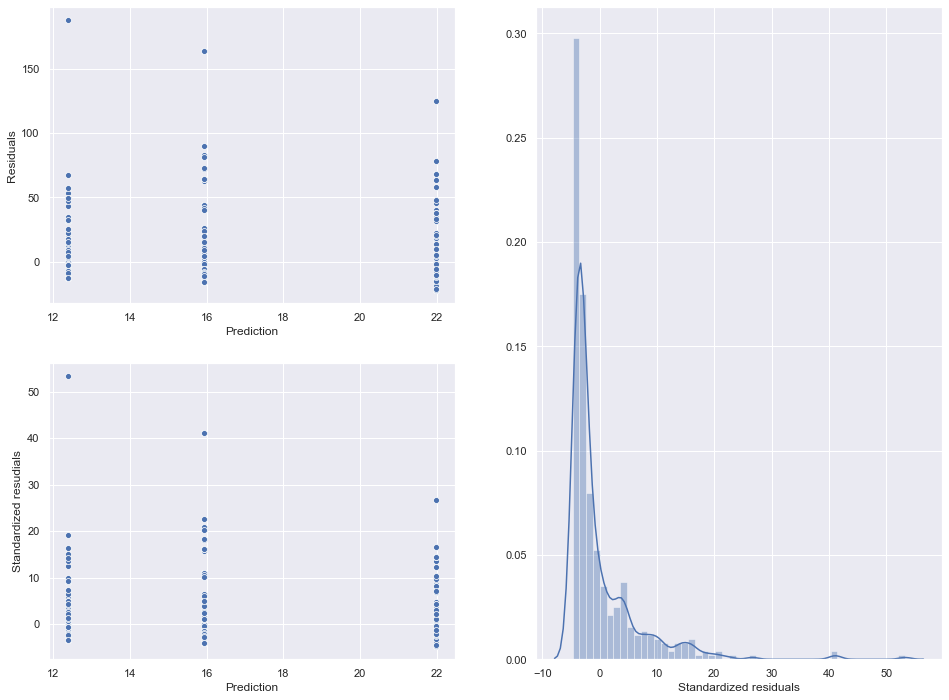

In [5]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])
sns.scatterplot(x=mdl_a.predict(hiv_df), y=resid, ax=ax1)
sns.scatterplot(x=mdl_a.predict(hiv_df), y=std_residuals, ax=ax2)
sns.distplot(std_residuals, kde=True, axlabel="Standardized residuals")
ax1.set_xlabel("Prediction")
ax2.set_xlabel("Prediction")
ax1.set_ylabel("Residuals")
ax2.set_ylabel("Standardized resudials")
fig.set_size_inches(16, 12)

Bad fit, the overdispersion factor is very high.

In [6]:
mdl_b = smf.poisson(data=hiv_df, formula="fupacts ~ couples + women_alone + sex + bs_hiv + bupacts").fit()
mdl_b.summary()

Optimization terminated successfully.
         Current function value: 13.282019
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                fupacts   No. Observations:                  434
Model:                        Poisson   Df Residuals:                      428
Method:                           MLE   Df Model:                            5
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                  0.2120
Time:                        16:12:52   Log-Likelihood:                -5764.4
converged:                       True   LL-Null:                       -7315.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8961      0.023    124.821      0.000       2.851       2.942
sex[T.man]            -0.1085      0.024     -4.572      0.000      -0.155      -0.062
bs_hiv[T.positive]    -0.4376      0.035    -12.371      0.000      -0.507      -0.368
couples               -0.4104      0.028    -14.541      0.000      -0.466      -0.355
women_alone           -0.6643      0.031    -21.496      0.000      -0.725      -0.604
bupacts                0.0108      0.000     62.043      0.000       0.010       0.011
======================================================================================
"""

In [7]:
yhat = mdl_b.predict(hiv_df)
resid = hiv_df.fupacts - yhat # mdl_a.resid could be used here as well, going more straightforward for transparency
std_residuals = resid/np.sqrt(yhat)
sr_sq_sum = np.sum(std_residuals*std_residuals)
mdl_b_overdispersion_ratio = sr_sq_sum/(len(hiv_df) - 5) # 5 for the number of predictors
mdl_b_overdispersion_p_value = stats.chi2.cdf(sr_sq_sum, df=mdl_b.df_resid)
f"Overdispersion ratio is {mdl_b_overdispersion_ratio}, p-value of it is {mdl_b_overdispersion_p_value}"

'Overdispersion ratio is 29.942248987890537, p-value of it is 1.0'

Better fit, the overdispersion went down a bit, yet is still too high.

Now we have to dive into depths of github as Quasi Poisson model is currently not implemented in statsmodel. Yet there's a [py-glm](https://github.com/madrury/py-glm) package which should work

In [8]:
from glm.glm import GLM
from glm.families import QuasiPoisson, Poisson

In [9]:
mdl_c = GLM(family=QuasiPoisson())
mdl_c.fit(X=hiv_df, formula="fupacts ~ couples + women_alone + sex + bs_hiv + bupacts")
mdl_c.summary()

QuasiPoisson GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                  2.90            0.11
sex[T.man]                -0.11            0.12
bs_hiv[T.positive]        -0.44            0.17
couples                   -0.41            0.14
women_alone               -0.66            0.15
bupacts                    0.01            0.00


In [10]:
mdl_c.deviance_

array(10204.40440327)

In [11]:
mdl_c.dispersion_

array(23.84206636)

As suggested by these [two](https://github.com/statsmodels/statsmodels/issues/2804) [links](https://github.com/statsmodels/statsmodels/issues/4942) we try an hc0 covariance type fit. The covariance types description is present [here](https://cran.r-project.org/web/packages/sandwich/vignettes/sandwich.pdf).

In [12]:
mdl_c1 = smf.poisson(data=hiv_df, formula="fupacts ~ couples + women_alone + sex + bs_hiv + bupacts").fit(cov_type='HC0')
mdl_c1.summary()

Optimization terminated successfully.
         Current function value: 13.282019
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                fupacts   No. Observations:                  434
Model:                        Poisson   Df Residuals:                      428
Method:                           MLE   Df Model:                            5
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                  0.2120
Time:                        16:12:52   Log-Likelihood:                -5764.4
converged:                       True   LL-Null:                       -7315.5
Covariance Type:                  HC0   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8961      0.129     22.479      0.000       2.644       3.149
sex[T.man]            -0.1085      0.143     -0.758      0.448      -0.389       0.172
bs_hiv[T.positive]    -0.4376      0.200     -2.186      0.029      -0.830      -0.045
couples               -0.4104      0.176     -2.329      0.020      -0.756      -0.065
women_alone           -0.6643      0.151     -4.395      0.000      -0.961      -0.368
bupacts                0.0108      0.001      8.376      0.000       0.008       0.013
======================================================================================
"""

In [13]:
yhat = mdl_c1.predict(hiv_df)
resid = hiv_df.fupacts - yhat # mdl_a.resid could be used here as well, going more straightforward for transparency
std_residuals = resid/np.sqrt(yhat)
sr_sq_sum = np.sum(std_residuals*std_residuals)
mdl_c1_overdispersion_ratio = sr_sq_sum/(len(hiv_df) - 5) # 5 for the number of predictors
mdl_c1_overdispersion_p_value = stats.chi2.cdf(sr_sq_sum, df=mdl_c1.df_resid)
f"Overdispersion ratio is {mdl_c1_overdispersion_ratio}, p-value of it is {mdl_c1_overdispersion_p_value}"

'Overdispersion ratio is 29.942248987890537, p-value of it is 1.0'

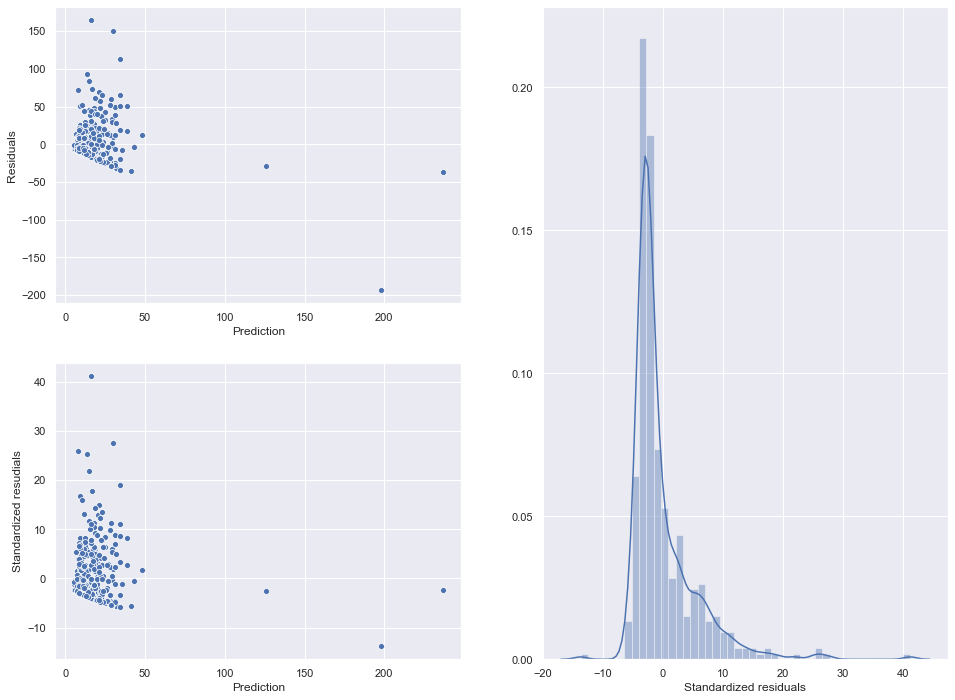

In [14]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])
sns.scatterplot(x=mdl_c1.predict(hiv_df), y=resid, ax=ax1)
sns.scatterplot(x=mdl_c1.predict(hiv_df), y=std_residuals, ax=ax2)
sns.distplot(std_residuals, kde=True, axlabel="Standardized residuals")
ax1.set_xlabel("Prediction")
ax2.set_xlabel("Prediction")
ax1.set_ylabel("Residuals")
ax2.set_ylabel("Standardized resudials")
fig.set_size_inches(16, 12)

The fit got better, from the standard error values it is clear that the overdispersion is considered in the fit process.

Coefficient interpretation-wise it is clear that the councelling provides a positive effect, yet the effect is not that strong when the treatment is done for a couple rather than a women.